In [ ]:
from bs4 import BeautifulSoup as bs
import requests
import re

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3",
    "Accept-Language": "en-US,en;q=0.5",
    "Connection": "keep-alive"
}
cookies = {"session_id": "1234567890abcdef"}

top_links = []
reg_links = []

for page in range(1,101):
  url = "https://www.list.am/en/category/23/" + str(page)


  req = requests.get(url,headers=headers,cookies=cookies)
  src = req.text
  soup = bs(src,"lxml")


  #top ads div
  top_ads = soup.find_all("div",class_="dl")[0]

  for link in top_ads.find_all('a'):
      if re.search(r'\bitem\b', link.get('href')): # and "https://www.list.am"+link.get('href') not in top_links
          top_links.append("https://www.list.am"+link.get('href'))

  #default ads div
  regular_ads = soup.find_all("div",class_="dl")[1]

  for link in regular_ads.find_all('a'):
      if re.search(r'\bitem\b', link.get('href')):
          reg_links.append("https://www.list.am"+link.get('href'))



'''
  price = dl.find_all('div',class_='p')
  city = dl.find_all('div',class_='at')
  h1 = dl.find_all('div',class_='l')
  '''

"\n  price = dl.find_all('div',class_='p')\n  city = dl.find_all('div',class_='at')\n  h1 = dl.find_all('div',class_='l')\n  "

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
all_links = list(set(top_links + reg_links))
len(list(set(top_links + reg_links)))

10067

In [ ]:
import csv
with open('all_links.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Links"])
    writer.writerows([[link] for link in all_links])

Parsing all info into csv file:

In [ ]:
import pandas as pd

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3",
    "Accept-Language": "en-US,en;q=0.5",
    "Connection": "keep-alive"
}
cookies = {"session_id": "1234567890abcdef"}


# columns = [div.get_text() for div in soup.find_all("div", class_="t")]
# len(columns)

columns = ['Make',
 'Model',
 'Body Type',
 'Year',
 'Engine Type',
 'Engine Size',
 'Transmission',
 'Drive Type',
 'Mileage',
 'Condition',
 'Gas Equipment',
 'Steering Wheel',
 'Cleared Customs',
 'Color',
 'Wheel Size',
 'Headlights',
 'Interior Color',
 'Interior Material',
 'Sunroof',
 'Comfort',
           'y']




df = pd.DataFrame(columns = columns)
nodata = []
#finding
for i in range(0,len(all_links)-1):

  print(i,end=', ') if i%5 == 0 else None #to see wheres the  loop
  print(len(nodata),end=', ') if i%20 == 0 else None # to see if nodata lines are more than excepted
  url  = all_links[i]
  req = requests.get(url,headers=headers,cookies=cookies)
  src = req.text

  soup = bs(src,"lxml")

  infos = [div.get_text() for div in soup.find_all("div", class_="i")]
  tables = [div.get_text() for div in soup.find_all("div", class_="t")]
  if len(infos)<16:
    nodata.append(i)
    continue
  plusIndex = tables[10] == 'Gas Equipment'
  price = soup.find("span", class_="price x")
  soup = bs(src,"lxml")
  # [div.get_text() for div in soup.find_all("div", class_="i")]
  new_row_data = {'Make':infos[0],
                  'Model':infos[1],
                  'Body Type':infos[2],
                  'Year':infos[3],
                  'Engine Type':infos[4],
                  'Engine Size':infos[5],
                  'Transmission':infos[6],
                  'Drive Type':infos[7],
                  'Mileage':infos[8],
                  'Condition':infos[9],
                  'Gas Equipment':infos[10] if plusIndex  else None,
                  'Steering Wheel':infos[tables.index('Steering Wheel')],
                  'Cleared Customs':infos[12] if tables[12] == 'Cleared Customs' else infos[11],
                  'Color':infos[13] if tables[13] == 'Color' else infos[12],
                  'Wheel Size':infos[14] if tables[14] == 'Wheel Size' else infos[13],
                  'Headlights':infos[15] if tables[15] == 'Headlights' else infos[14],
                  'Interior Color': infos[tables.index('Headlights')+1] ,
                  'Interior Material':infos[tables.index('Interior Color')+1] ,
                  'Sunroof': infos[tables.index('Interior Material')+1] ,
                  'Comfort': infos[tables.index('Sunroof')+1] if 'Comfort' in tables else None,
                  'y':price.text if price else None
  }

  # df = df.append(new_row_data, ignore_index=True)
  df = pd.concat([df, pd.DataFrame(new_row_data, index=[i-len(nodata)])])


nodata

In [ ]:
# df.to_csv("list_data.csv",index=False)

**Working with *data***

---



In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("list_data.csv")

type(data)

pandas.core.frame.DataFrame

In [49]:
data.shape

(9881, 21)

In [50]:
data.head()

,Make,Model,Body Type,Year,Engine Type,Engine Size,Transmission,Drive Type,Mileage,Condition,...,Steering Wheel,Cleared Customs,Color,Wheel Size,Headlights,Interior Color,Interior Material,Sunroof,Comfort,y
0,Hyundai,Solaris,Sedan,2016,Gasoline,1.6 L,Automatic,Front Wheel Drive,"22,000 km",Car is not damaged,...,Left,Yes,White,R15,Хenon Headlights,Black,Leatherette,No,"Air conditioner, cruise control, tinted windows","$11,000"
1,Honda,Accord,Sedan,2021,Gasoline,2.0 L,Automatic,Front Wheel Drive,"12,000 km",Car is not damaged,...,Left,No,Black,R18,LED Headlights,Black,Leather,Regular Sunroof,"Air conditioner, heated seats, heated steering...","$28,000"
2,Opel,Astra,Hatchback,1999,Gasoline,1.6 L,Manual,Front Wheel Drive,"260,000 km",Car is not damaged,...,Left,Yes,Silver,R16,LED Headlights,Black,Textile,No,"Air conditioner, tinted windows","$5,200"
3,Ford,Fusion (North America),Sedan,2013,Gasoline,1.6 L,Automatic,Front Wheel Drive,"120,000 miles",Car is not damaged,...,Left,No,Black,R18,Хenon Headlights,Black,Leather,Regular Sunroof,"Air conditioner, heated seats, cruise control,...","$8,450"
4,Lexus,GX,SUV / Crossover,2011,Gasoline,4.6 L,Automatic,All Wheel Drive,"106,000 km",Car is not damaged,...,Left,Yes,Black,R20,Хenon Headlights,Black,Leather,Regular Sunroof,"Air conditioner, heated seats, cruise control,...","$38,500"


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9881 entries, 0 to 9880
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               9881 non-null   object
 1   Model              9842 non-null   object
 2   Body Type          9881 non-null   object
 3   Year               9881 non-null   int64 
 4   Engine Type        9881 non-null   object
 5   Engine Size        9881 non-null   object
 6   Transmission       9881 non-null   object
 7   Drive Type         9881 non-null   object
 8   Mileage            9881 non-null   object
 9   Condition          9881 non-null   object
 10  Gas Equipment      4054 non-null   object
 11  Steering Wheel     9881 non-null   object
 12  Cleared Customs    9881 non-null   object
 13  Color              9881 non-null   object
 14  Wheel Size         9881 non-null   object
 15  Headlights         9881 non-null   object
 16  Interior Color     9881 non-null   object


In [52]:
data.isnull().sum()

Make                    0
Model                  39
Body Type               0
Year                    0
Engine Type             0
Engine Size             0
Transmission            0
Drive Type              0
Mileage                 0
Condition               0
Gas Equipment        5827
Steering Wheel          0
Cleared Customs         0
Color                   0
Wheel Size              0
Headlights              0
Interior Color          0
Interior Material       0
Sunroof                 0
Comfort              2113
y                     145
dtype: int64

In [53]:
data["Make"].value_counts()

Mercedes-Benz    1322
Toyota            878
Nissan            857
VAZ (Lada)        700
BMW               696
                 ... 
ZiS (ЗиС)           1
Seat                1
Datsun              1
Scion               1
ShuangHuan          1
Name: Make, Length: 80, dtype: int64

In [54]:
data.dropna(subset=['y'], inplace=True)

In [55]:
data["Model"] = data['Model'].fillna('')
data["Make"] = data["Make"] + ' ' + data['Model']
data['Make'][:50]
data.drop(columns='Model',inplace=True)
data.head()

,Make,Body Type,Year,Engine Type,Engine Size,Transmission,Drive Type,Mileage,Condition,Gas Equipment,Steering Wheel,Cleared Customs,Color,Wheel Size,Headlights,Interior Color,Interior Material,Sunroof,Comfort,y
0,Hyundai Solaris,Sedan,2016,Gasoline,1.6 L,Automatic,Front Wheel Drive,"22,000 km",Car is not damaged,NaN,Left,Yes,White,R15,Хenon Headlights,Black,Leatherette,No,"Air conditioner, cruise control, tinted windows","$11,000"
1,Honda Accord,Sedan,2021,Gasoline,2.0 L,Automatic,Front Wheel Drive,"12,000 km",Car is not damaged,NaN,Left,No,Black,R18,LED Headlights,Black,Leather,Regular Sunroof,"Air conditioner, heated seats, heated steering...","$28,000"
2,Opel Astra,Hatchback,1999,Gasoline,1.6 L,Manual,Front Wheel Drive,"260,000 km",Car is not damaged,Installed,Left,Yes,Silver,R16,LED Headlights,Black,Textile,No,"Air conditioner, tinted windows","$5,200"
3,Ford Fusion (North America),Sedan,2013,Gasoline,1.6 L,Automatic,Front Wheel Drive,"120,000 miles",Car is not damaged,NaN,Left,No,Black,R18,Хenon Headlights,Black,Leather,Regular Sunroof,"Air conditioner, heated seats, cruise control,...","$8,450"
4,Lexus GX,SUV / Crossover,2011,Gasoline,4.6 L,Automatic,All Wheel Drive,"106,000 km",Car is not damaged,NaN,Left,Yes,Black,R20,Хenon Headlights,Black,Leather,Regular Sunroof,"Air conditioner, heated seats, cruise control,...","$38,500"


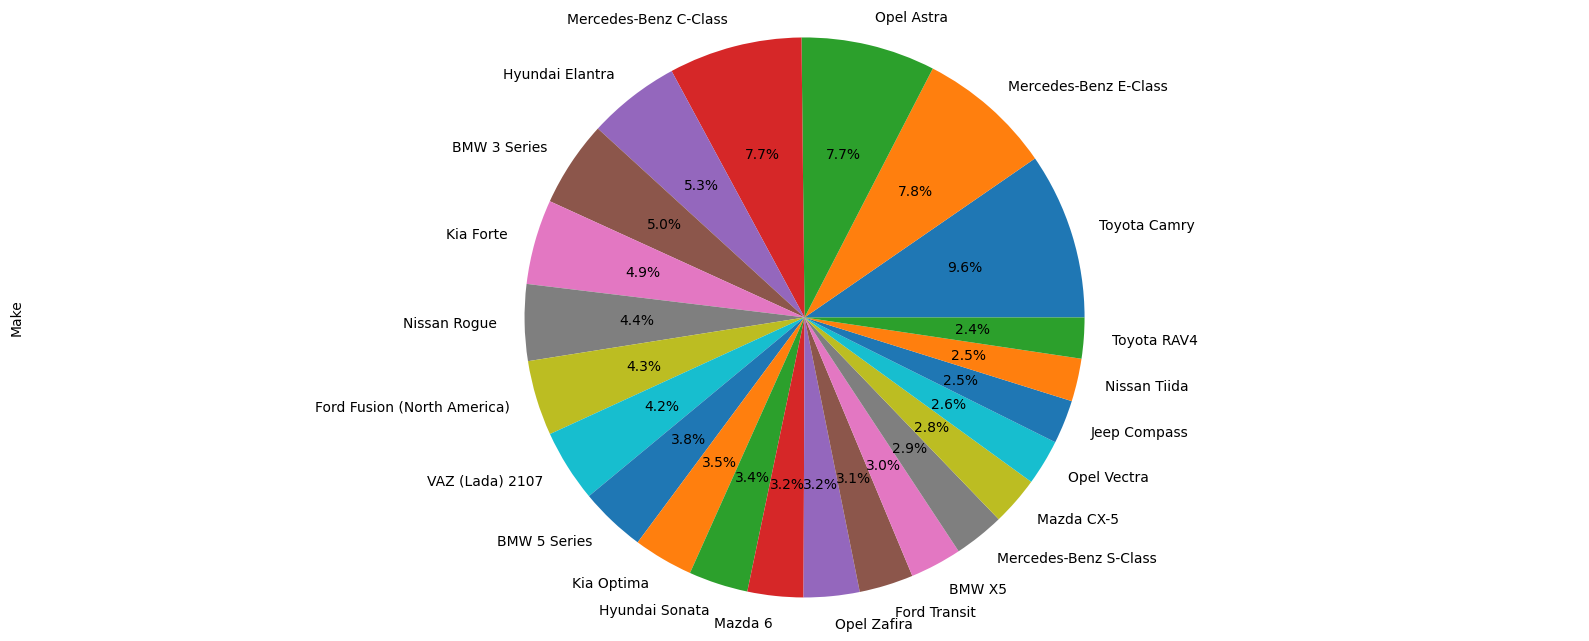

4286


In [56]:
plt.figure(figsize = (20, 8))
counts = data["Make"].value_counts()
counts = counts[counts > 100]
# counts.append(pd.Series({'other': len(data['Make']) - sum(counts.values)}))#the line isnot working;/
counts.plot(kind = 'pie',autopct = '%1.1f%%')
plt.axis('equal')
plt.show()
print(sum(counts.values))

In [57]:
data['y'] = data['y'].str.replace(',', '')

In [58]:
price_column = list(data['y'])
y = []
for every in price_column:
  if every[0] == '$':
    every = every[1:]
  if every[-1] == '֏':
    every = int(every[:-2])*0.0025
  y.append(int(every))

In [59]:
data['y'] = y
data.head()

,Make,Body Type,Year,Engine Type,Engine Size,Transmission,Drive Type,Mileage,Condition,Gas Equipment,Steering Wheel,Cleared Customs,Color,Wheel Size,Headlights,Interior Color,Interior Material,Sunroof,Comfort,y
0,Hyundai Solaris,Sedan,2016,Gasoline,1.6 L,Automatic,Front Wheel Drive,"22,000 km",Car is not damaged,NaN,Left,Yes,White,R15,Хenon Headlights,Black,Leatherette,No,"Air conditioner, cruise control, tinted windows",11000
1,Honda Accord,Sedan,2021,Gasoline,2.0 L,Automatic,Front Wheel Drive,"12,000 km",Car is not damaged,NaN,Left,No,Black,R18,LED Headlights,Black,Leather,Regular Sunroof,"Air conditioner, heated seats, heated steering...",28000
2,Opel Astra,Hatchback,1999,Gasoline,1.6 L,Manual,Front Wheel Drive,"260,000 km",Car is not damaged,Installed,Left,Yes,Silver,R16,LED Headlights,Black,Textile,No,"Air conditioner, tinted windows",5200
3,Ford Fusion (North America),Sedan,2013,Gasoline,1.6 L,Automatic,Front Wheel Drive,"120,000 miles",Car is not damaged,NaN,Left,No,Black,R18,Хenon Headlights,Black,Leather,Regular Sunroof,"Air conditioner, heated seats, cruise control,...",8450
4,Lexus GX,SUV / Crossover,2011,Gasoline,4.6 L,Automatic,All Wheel Drive,"106,000 km",Car is not damaged,NaN,Left,Yes,Black,R20,Хenon Headlights,Black,Leather,Regular Sunroof,"Air conditioner, heated seats, cruise control,...",38500


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9736 entries, 0 to 9880
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               9736 non-null   object
 1   Body Type          9736 non-null   object
 2   Year               9736 non-null   int64 
 3   Engine Type        9736 non-null   object
 4   Engine Size        9736 non-null   object
 5   Transmission       9736 non-null   object
 6   Drive Type         9736 non-null   object
 7   Mileage            9736 non-null   object
 8   Condition          9736 non-null   object
 9   Gas Equipment      4018 non-null   object
 10  Steering Wheel     9736 non-null   object
 11  Cleared Customs    9736 non-null   object
 12  Color              9736 non-null   object
 13  Wheel Size         9736 non-null   object
 14  Headlights         9736 non-null   object
 15  Interior Color     9736 non-null   object
 16  Interior Material  9736 non-null   object


In [61]:
for every in data.columns:
  print(data[every].value_counts(dropna = False))

Toyota Camry             412
Mercedes-Benz E-Class    335
Opel Astra               332
Mercedes-Benz C-Class    330
Hyundai Elantra          229
                        ... 
Honda Ridgeline            1
Chevrolet Silverado        1
Mercedes-Benz EQS SUV      1
Kia Picanto                1
Mercedes-Benz 230          1
Name: Make, Length: 720, dtype: int64
Sedan              4852
SUV / Crossover    2947
Hatchback           827
Minivan             409
Van                 227
Coupe               188
Wagon               168
Liftback             39
Pickup               37
Minibus              25
Convertible          12
Roadster              3
Limo                  1
Fastback              1
Name: Body Type, dtype: int64
2018    724
2017    718
2019    702
2020    483
2016    467
       ... 
1970      1
1961      1
1947      1
1958      1
1938      1
Name: Year, Length: 71, dtype: int64
Gasoline    9155
Diesel       255
Hybrid       188
Electric     138
Name: Engine Type, dtype: int64
2.0 L   

Condition:
  Car is not damaged    9100

  Car is damaged         439

 Missing values:Left                   155,
Installed               33,Right                    2


In [62]:
data['Condition'].replace({
    'Car is not damaged': 1,
    'Car is damaged': 0,
    'Left': np.random.choice([0, 1], size=155, p=[1 - 9100/(9100+439), 9100/(9100+439)]),
    'Installed': np.random.choice([0, 1], size=33, p=[1 - 9100/(9100+439), 9100/(9100+439)]),
    'Right': np.random.choice([0, 1], size=2, p=[1 - 9100/(9100+439), 9100/(9100+439)])
},inplace = True)

In [63]:
data['Condition'].value_counts(dropna = False)

1    9286
0     450
Name: Condition, dtype: int64

In [64]:
data['Comfort'] = data['Comfort'].apply(lambda x: 0 if pd.isna(x) else x.count(',') + 1)
data['Comfort'].value_counts()

0    2069
3    1727
1    1339
4    1289
2    1239
6    1235
5     838
Name: Comfort, dtype: int64

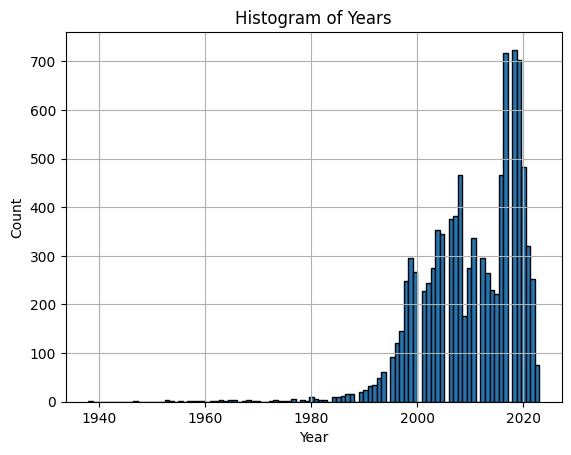

In [65]:
plt.hist(data['Year'], bins=100, edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Histogram of Years')
plt.grid(True)
plt.show()

In [66]:
data['Mileage'] = data['Mileage'].str.replace(',','')
dict(data['Mileage'].value_counts())

{'200000 km': 308,
 '300000 km': 203,
 '250000 km': 196,
 '150000 km': 167,
 '100000 km': 149,
 'Car is not damaged': 132,
 '180000 km': 130,
 '190000 km': 104,
 '220000 km': 103,
 '160000 km': 101,
 '120000 km': 96,
 '230000 km': 96,
 '170000 km': 93,
 '140000 km': 85,
 '210000 km': 81,
 '130000 km': 81,
 '240000 km': 79,
 '270000 km': 71,
 '110000 km': 61,
 '80000 km': 60,
 '280000 km': 60,
 '260000 km': 58,
 '90000 km': 57,
 '70000 km': 56,
 '50000 km': 50,
 '60000 km': 50,
 '290000 km': 45,
 '175000 km': 45,
 '320000 km': 44,
 '400000 km': 44,
 '50000 miles': 41,
 '350000 km': 40,
 '145000 km': 39,
 '80000 miles': 39,
 '195000 km': 38,
 '215000 km': 37,
 '155000 km': 37,
 '100000 miles': 36,
 '60000 miles': 35,
 '125000 km': 34,
 '95000 km': 34,
 '135000 km': 34,
 '120000 miles': 34,
 '85000 km': 33,
 '330000 km': 32,
 '165000 km': 32,
 '130000 miles': 32,
 '40000 km': 32,
 '90000 miles': 31,
 '20000 km': 31,
 '225000 km': 30,
 '30000 km': 29,
 '40000 miles': 29,
 '10000 km': 28,
 

In [67]:
avgKM = 155666
def mileage_apply(x):
  if x[-1] == 'm':
    x = x[:-3]
  if x[-1] == 's':
    x = x[:-6]
    x = int(x) * 1.60934
  else:
    return avgKM #for missing values to fill it after with mean (there are Car is not damaged': 132)
  return int(x)


#used for counting average KM

# MILE = dict(data['Mileage'].value_counts())
# del MILE['Car is damaged']
# del MILE['Car is not damaged']
# print(MILE)
# avgMILE = sum(int(km) * count for km, count in MILE.items()) / sum(MILE.values())
# avgKM = int(avgMILE)
# 155666

In [68]:
data['Mileage'] = data['Mileage'].apply(mileage_apply)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9736 entries, 0 to 9880
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               9736 non-null   object
 1   Body Type          9736 non-null   object
 2   Year               9736 non-null   int64 
 3   Engine Type        9736 non-null   object
 4   Engine Size        9736 non-null   object
 5   Transmission       9736 non-null   object
 6   Drive Type         9736 non-null   object
 7   Mileage            9736 non-null   int64 
 8   Condition          9736 non-null   int64 
 9   Gas Equipment      4018 non-null   object
 10  Steering Wheel     9736 non-null   object
 11  Cleared Customs    9736 non-null   object
 12  Color              9736 non-null   object
 13  Wheel Size         9736 non-null   object
 14  Headlights         9736 non-null   object
 15  Interior Color     9736 non-null   object
 16  Interior Material  9736 non-null   object


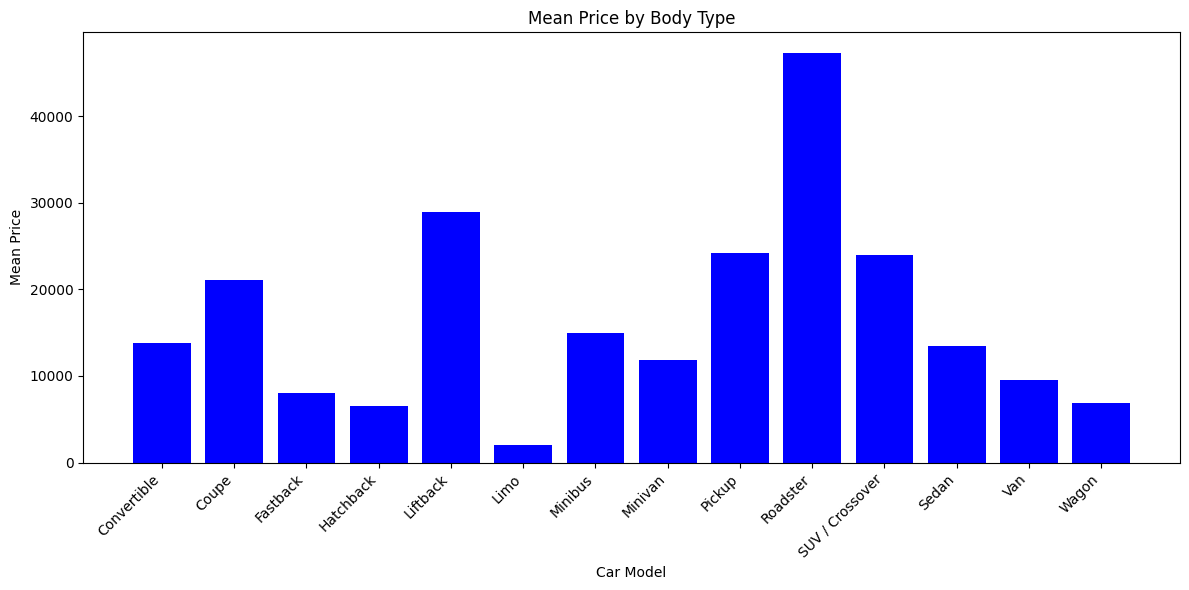

In [70]:
model_price_mean = data.groupby('Body Type')['y'].mean().reset_index()


plt.figure(figsize=(12, 6))
plt.bar(model_price_mean['Body Type'], model_price_mean['y'], color='blue')
plt.xlabel('Car Model')
plt.ylabel('Mean Price')
plt.title('Mean Price by Body Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [71]:
data['Body Type'].value_counts()

Sedan              4852
SUV / Crossover    2947
Hatchback           827
Minivan             409
Van                 227
Coupe               188
Wagon               168
Liftback             39
Pickup               37
Minibus              25
Convertible          12
Roadster              3
Limo                  1
Fastback              1
Name: Body Type, dtype: int64

In [72]:
data.head()

,Make,Body Type,Year,Engine Type,Engine Size,Transmission,Drive Type,Mileage,Condition,Gas Equipment,Steering Wheel,Cleared Customs,Color,Wheel Size,Headlights,Interior Color,Interior Material,Sunroof,Comfort,y
0,Hyundai Solaris,Sedan,2016,Gasoline,1.6 L,Automatic,Front Wheel Drive,155666,1,NaN,Left,Yes,White,R15,Хenon Headlights,Black,Leatherette,No,3,11000
1,Honda Accord,Sedan,2021,Gasoline,2.0 L,Automatic,Front Wheel Drive,155666,1,NaN,Left,No,Black,R18,LED Headlights,Black,Leather,Regular Sunroof,6,28000
2,Opel Astra,Hatchback,1999,Gasoline,1.6 L,Manual,Front Wheel Drive,155666,1,Installed,Left,Yes,Silver,R16,LED Headlights,Black,Textile,No,2,5200
3,Ford Fusion (North America),Sedan,2013,Gasoline,1.6 L,Automatic,Front Wheel Drive,193120,1,NaN,Left,No,Black,R18,Хenon Headlights,Black,Leather,Regular Sunroof,4,8450
4,Lexus GX,SUV / Crossover,2011,Gasoline,4.6 L,Automatic,All Wheel Drive,155666,1,NaN,Left,Yes,Black,R20,Хenon Headlights,Black,Leather,Regular Sunroof,4,38500


In [73]:
xxx = dict(data['Engine Size'].value_counts())
del xxx['Automatic']
del xxx['Manual']
avgxxx = sum(int(float(l[:-2])) * count for l, count in xxx.items()) / sum(xxx.values())
avgxxx

2.033850640558275

In [74]:
def Engine_apply(x):
  if x[-1] == 'L':
    x = float(x[:-2])
  else:
    x = avgxxx
  return x

In [75]:
data['Engine Size'] = data['Engine Size'].apply(Engine_apply)

In [76]:
data['Engine Type'].value_counts()

Gasoline    9155
Diesel       255
Hybrid       188
Electric     138
Name: Engine Type, dtype: int64

In [77]:
one_hot_encoded = pd.get_dummies(data['Engine Type'])
one_hot_encoded

,Diesel,Electric,Gasoline,Hybrid
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
9876,0,0,1,0
9877,0,0,1,0
9878,0,0,1,0
9879,0,0,1,0


In [78]:
data = pd.concat([data, one_hot_encoded], axis=1)


In [79]:
data.describe()

,Year,Engine Size,Mileage,Condition,Comfort,y,Diesel,Electric,Gasoline,Hybrid
count,9736.000000,9736.000000,9.736000e+03,9736.000000,9736.000000,9736.000000,9736.000000,9736.000000,9736.000000,9736.000000
mean,2010.035846,2.431642,1.478441e+05,0.953780,2.645234,16057.636196,0.026191,0.014174,0.940325,0.019310
std,8.959341,0.910101,4.568060e+04,0.209972,2.020609,20037.611011,0.159712,0.118215,0.236897,0.137619
min,1938.000000,0.600000,1.700000e+01,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,1.800000,1.556660e+05,1.000000,1.000000,6000.000000,0.000000,0.000000,1.000000,0.000000
50%,2011.000000,2.300000,1.556660e+05,1.000000,3.000000,12000.000000,0.000000,0.000000,1.000000,0.000000
75%,2018.000000,2.500000,1.556660e+05,1.000000,4.000000,19700.000000,0.000000,0.000000,1.000000,0.000000
max,2023.000000,7.300000,1.029977e+06,1.000000,6.000000,1000000.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
enc = pd.get_dummies(data['Steering Wheel'])
enc

,Left,Right
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9876,1,0
9877,1,0
9878,1,0
9879,1,0


In [81]:
data = pd.concat([data, enc], axis=1)
# data.drop('Steering Wheel')

In [82]:
data.columns

Index(['Make', 'Body Type', 'Year', 'Engine Type', 'Engine Size',
       'Transmission', 'Drive Type', 'Mileage', 'Condition', 'Gas Equipment',
       'Steering Wheel', 'Cleared Customs', 'Color', 'Wheel Size',
       'Headlights', 'Interior Color', 'Interior Material', 'Sunroof',
       'Comfort', 'y', 'Diesel', 'Electric', 'Gasoline', 'Hybrid', 'Left',
       'Right'],
      dtype='object')

In [83]:
data.drop(columns = ['Engine Type','Steering Wheel'],inplace=True)
data.columns

Index(['Make', 'Body Type', 'Year', 'Engine Size', 'Transmission',
       'Drive Type', 'Mileage', 'Condition', 'Gas Equipment',
       'Cleared Customs', 'Color', 'Wheel Size', 'Headlights',
       'Interior Color', 'Interior Material', 'Sunroof', 'Comfort', 'y',
       'Diesel', 'Electric', 'Gasoline', 'Hybrid', 'Left', 'Right'],
      dtype='object')

In [84]:
data.drop(columns = ['Body Type'],inplace=True)
data.head()

,Make,Year,Engine Size,Transmission,Drive Type,Mileage,Condition,Gas Equipment,Cleared Customs,Color,...,Interior Material,Sunroof,Comfort,y,Diesel,Electric,Gasoline,Hybrid,Left,Right
0,Hyundai Solaris,2016,1.6,Automatic,Front Wheel Drive,155666,1,NaN,Yes,White,...,Leatherette,No,3,11000,0,0,1,0,1,0
1,Honda Accord,2021,2.0,Automatic,Front Wheel Drive,155666,1,NaN,No,Black,...,Leather,Regular Sunroof,6,28000,0,0,1,0,1,0
2,Opel Astra,1999,1.6,Manual,Front Wheel Drive,155666,1,Installed,Yes,Silver,...,Textile,No,2,5200,0,0,1,0,1,0
3,Ford Fusion (North America),2013,1.6,Automatic,Front Wheel Drive,193120,1,NaN,No,Black,...,Leather,Regular Sunroof,4,8450,0,0,1,0,1,0
4,Lexus GX,2011,4.6,Automatic,All Wheel Drive,155666,1,NaN,Yes,Black,...,Leather,Regular Sunroof,4,38500,0,0,1,0,1,0


In [85]:
data['Transmission'].value_counts(dropna=False)

Automatic            7231
Manual               2370
All Wheel Drive        56
Front Wheel Drive      40
Rear Wheel Drive       39
Name: Transmission, dtype: int64

In [86]:
data['Transmission'].replace({
    'Automatic':1,
    'Manual':0,
    'All Wheel Drive': np.random.choice([1,0], size=56, p=[1 - 2370/(9601), 2370/(9601)]),
    'Front Wheel Drive': np.random.choice([1,0], size=40, p=[1 - 2370/(9601), 2370/(9601)]),
    'Rear Wheel Drive': np.random.choice([1,0], size=39, p=[1 - 2370/(9601), 2370/(9601)])
},inplace = True)
data['Transmission'].value_counts(dropna=False)


1    7323
0    2413
Name: Transmission, dtype: int64

In [87]:
data['Drive Type'].value_counts(dropna=False)

Front Wheel Drive    4727
All Wheel Drive      2861
Rear Wheel Drive     2013
10 km                   8
50 km                   4
                     ... 
8000 km                 1
11 km                   1
35,000 km               1
50,000 miles            1
27,656 km               1
Name: Drive Type, Length: 103, dtype: int64

In [88]:
# data.loc[~data['Drive Type'].isin(('Front Wheel Drive', 'All Wheel Drive', 'Rear Wheel Drive')), 'Drive Type'] = np.random.choice(['Front Wheel Drive', 'All Wheel Drive', 'Rear Wheel Drive'], size=len(data['Drive Type']-4727-2861-2013), p=[4727/(4727+2861+2013), 2861/(4727+2861+2013), 2013/(4727+2861+2013)])
drive_types = ['Front Wheel Drive', 'All Wheel Drive', 'Rear Wheel Drive']

mask = ~data['Drive Type'].isin(drive_types)

num_replacements = mask.sum()

data.loc[mask, 'Drive Type'] = np.random.choice(drive_types, size=num_replacements, p=[4727/(4727+2861+2013), 2861/(4727+2861+2013), 2013/(4727+2861+2013)])

data['Drive Type'].value_counts(dropna=False)

Front Wheel Drive    4792
All Wheel Drive      2893
Rear Wheel Drive     2051
Name: Drive Type, dtype: int64

In [89]:
enc = pd.get_dummies(data['Drive Type'])
data = pd.concat([data, enc], axis=1)

data.drop(columns = ['Drive Type'],inplace=True)
data.head()

,Make,Year,Engine Size,Transmission,Mileage,Condition,Gas Equipment,Cleared Customs,Color,Wheel Size,...,y,Diesel,Electric,Gasoline,Hybrid,Left,Right,All Wheel Drive,Front Wheel Drive,Rear Wheel Drive
0,Hyundai Solaris,2016,1.6,1,155666,1,NaN,Yes,White,R15,...,11000,0,0,1,0,1,0,0,1,0
1,Honda Accord,2021,2.0,1,155666,1,NaN,No,Black,R18,...,28000,0,0,1,0,1,0,0,1,0
2,Opel Astra,1999,1.6,0,155666,1,Installed,Yes,Silver,R16,...,5200,0,0,1,0,1,0,0,1,0
3,Ford Fusion (North America),2013,1.6,1,193120,1,NaN,No,Black,R18,...,8450,0,0,1,0,1,0,0,1,0
4,Lexus GX,2011,4.6,1,155666,1,NaN,Yes,Black,R20,...,38500,0,0,1,0,1,0,1,0,0


In [90]:
data.drop(columns=['Color','Interior Color'],inplace=True)

In [91]:
data['Gas Equipment'] = data['Gas Equipment'].apply(lambda x: 0 if pd.isna(x) else 1)
data['Gas Equipment'].value_counts(dropna=False)

0    5718
1    4018
Name: Gas Equipment, dtype: int64

In [92]:
data['Cleared Customs'] = data['Cleared Customs'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Cleared Customs'].value_counts(dropna=False)

1    9207
0     529
Name: Cleared Customs, dtype: int64

In [93]:
data.head()

,Make,Year,Engine Size,Transmission,Mileage,Condition,Gas Equipment,Cleared Customs,Wheel Size,Headlights,...,y,Diesel,Electric,Gasoline,Hybrid,Left,Right,All Wheel Drive,Front Wheel Drive,Rear Wheel Drive
0,Hyundai Solaris,2016,1.6,1,155666,1,0,1,R15,Хenon Headlights,...,11000,0,0,1,0,1,0,0,1,0
1,Honda Accord,2021,2.0,1,155666,1,0,0,R18,LED Headlights,...,28000,0,0,1,0,1,0,0,1,0
2,Opel Astra,1999,1.6,0,155666,1,1,1,R16,LED Headlights,...,5200,0,0,1,0,1,0,0,1,0
3,Ford Fusion (North America),2013,1.6,1,193120,1,0,0,R18,Хenon Headlights,...,8450,0,0,1,0,1,0,0,1,0
4,Lexus GX,2011,4.6,1,155666,1,0,1,R20,Хenon Headlights,...,38500,0,0,1,0,1,0,1,0,0


In [94]:
data['Headlights'] = data['Headlights'].apply(lambda x: x if x[-1]=='s' else "d")
data['Headlights'].replace({
    'LED Headlights':'Led',
    'Halogen Headlights':"Halogen",
    'Хenon Headlights':'Xenon',
    'd': np.random.choice(['Led','Halogen','Xenon'], size=len(data['Headlights'])-3946-2854-2779, p=[3946/(3946+2854+2779),2854/(3946+2854+2779),2779/(3946+2854+2779)])
  },inplace = True)
data['Headlights'].value_counts(dropna=False)


Led        4009
Halogen    2906
Xenon      2821
Name: Headlights, dtype: int64

In [104]:
data = data[~(data['Wheel Size'].str[-1] == 's')]

data['Wheel Size'] = data['Wheel Size'].apply(lambda x: int(x[1:]))

In [105]:
data['Wheel Size'].value_counts(dropna=False)

17    2234
16    2151
18    1536
15    1394
19     797
20     532
14     429
13     310
21     105
22      78
23       4
10       3
26       3
25       2
12       1
Name: Wheel Size, dtype: int64

In [106]:
data

,Make,Year,Engine Size,Transmission,Mileage,Condition,Gas Equipment,Cleared Customs,Wheel Size,Headlights,...,Diesel,Electric,Gasoline,Hybrid,Left,Right,All Wheel Drive,Front Wheel Drive,Rear Wheel Drive,Wheel data
0,Hyundai Solaris,2016,1.6,1,155666,1,0,1,15,Xenon,...,0,0,1,0,1,0,0,1,0,15
1,Honda Accord,2021,2.0,1,155666,1,0,0,18,Led,...,0,0,1,0,1,0,0,1,0,18
2,Opel Astra,1999,1.6,0,155666,1,1,1,16,Led,...,0,0,1,0,1,0,0,1,0,16
3,Ford Fusion (North America),2013,1.6,1,193120,1,0,0,18,Xenon,...,0,0,1,0,1,0,0,1,0,18
4,Lexus GX,2011,4.6,1,155666,1,0,1,20,Xenon,...,0,0,1,0,1,0,1,0,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9876,Iran Khodro Samand,2009,1.8,0,155666,1,0,1,15,Halogen,...,0,0,1,0,1,0,0,1,0,15
9877,Mercedes-Benz 230,2006,2.3,1,155666,1,1,0,15,Xenon,...,0,0,1,0,1,0,0,0,1,15
9878,Toyota Camry,2019,2.5,1,155666,1,0,1,18,Led,...,0,0,1,0,1,0,0,1,0,18
9879,VAZ (Lada) 2107,2011,1.7,0,155666,1,0,0,13,Halogen,...,0,0,1,0,1,0,0,0,1,13
